### <center> DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING FOR INSURANCE CLAIMS DATA </center>


In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime,timedelta, date
import scipy.stats as stats

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims=pd.read_csv("E:\CS\AnalytixLabs 2022 December\Data Science 360\Python\Python Foundation Case Study 3 Insurance Claim\Case Study 3 - Insurance Claims Case Study\claims.csv")

In [3]:
cust_demographics=pd.read_csv("E:\CS\AnalytixLabs 2022 December\Data Science 360\Python\Python Foundation Case Study 3 Insurance Claim\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")

In [4]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [5]:
cust_demographics.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [6]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [7]:
cust_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [8]:
cust_demographics.rename(columns={'CUST_ID': 'customer_id'}, inplace=True)

In [9]:
cust_demographics.head(3)

,customer_id,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver


In [10]:
cust_demographics_claims=pd.merge(left=cust_demographics, right=claims, on='customer_id')

In [11]:
cust_demographics_claims.head(5)

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [12]:
cust_demographics_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   incident_cause       1085 non-null   object 
 8   claim_date           1085 non-null   object 
 9   claim_area           1085 non-null   object 
 10  police_report        1085 non-null   object 
 11  claim_type           1085 non-null   object 
 12  claim_amount         1020 non-null   object 
 13  total_policy_claims  1075 non-null   float64
 14  fraudulent           1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [13]:
cust_demographics_claims['DateOfBirth']=pd.to_datetime(cust_demographics_claims.DateOfBirth, format='%d-%b-%y')

In [14]:
cust_demographics_claims['claim_date']=pd.to_datetime(cust_demographics_claims.claim_date, format='%m/%d/%Y')

In [15]:
cust_demographics_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   object        
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   object        
 13  total_policy_claims  1075 non-nul

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [16]:
cust_demographics_claims['claim_amount']=cust_demographics_claims['claim_amount'].str.replace("$", '')

C:\Users\NSS\AppData\Local\Temp\ipykernel_18924\2533697354.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_demographics_claims['claim_amount']=cust_demographics_claims['claim_amount'].str.replace("$", '')


In [17]:
cust_demographics_claims.head(5)

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680,1.0,No


In [18]:
cust_demographics_claims['claim_amount']=pd.to_numeric(cust_demographics_claims.claim_amount)

In [19]:
cust_demographics_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   object        
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   float64       
 13  total_policy_claims  1075 non-nul

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [20]:
cust_demographics_claims['police_report']=np.where(cust_demographics_claims.police_report=='Unknown', 'No', 'Yes')

In [21]:
cust_demographics_claims['police_report']

0       Yes
1        No
2       Yes
3       Yes
4       Yes
       ... 
1080    Yes
1081    Yes
1082    Yes
1083    Yes
1084    Yes
Name: police_report, Length: 1085, dtype: object

In [22]:
cust_demographics_claims['flag']=np.where(cust_demographics_claims.police_report=='No', 1, 0)

In [23]:
cust_demographics_claims['flag']

0       0
1       1
2       0
3       0
4       0
       ..
1080    0
1081    0
1082    0
1083    0
1084    0
Name: flag, Length: 1085, dtype: int32

### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.

### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [24]:
cust_demographics_claims.customer_id.value_counts()

53539195    2
30308357    2
47830476    2
19269962    2
21831191    2
           ..
96431710    1
13059025    1
49481916    1
10956208    1
61575264    1
Name: customer_id, Length: 1078, dtype: int64

In [25]:
cust_demographics_claims[cust_demographics_claims.customer_id.duplicated()]

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,Yes,Material only,1950.0,6.0,No,0
5,47830476,Female,1986-05-01,MA,413-187-7945,Silver,91609100,Natural causes,2017-04-12,Auto,No,Material only,1440.0,1.0,No,1
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616,Other causes,2018-09-26,Auto,Yes,Material only,2240.0,2.0,No,0
9,21831191,Male,1977-05-17,NH,419-712-8513,Gold,91475471,Driver error,2018-02-09,Auto,No,Material and injury,36810.0,1.0,No,1
622,84147585,Male,1972-10-18,AK,743-569-4783,Gold,78221963,Driver error,2018-04-10,Auto,Yes,Injury only,14430.0,4.0,No,0
624,85357756,Male,1970-01-02,PA,915-698-3649,Platinum,1654201,Driver error,2018-06-23,Auto,No,Material only,2510.0,1.0,No,1
626,53539195,Male,1989-10-02,NV,914-342-8239,Gold,41779510,Driver error,2018-10-03,Home,Yes,Injury only,25040.0,1.0,No,0


In [26]:
cust_demographics_claims.sort_values(by='claim_date', ascending=False, inplace=True)

In [27]:
cust_demographics_claims.drop_duplicates(subset='customer_id', keep='first', inplace=True)

In [28]:
cust_demographics_claims.customer_id.duplicated()

286     False
354     False
1055    False
941     False
322     False
        ...  
231     False
905     False
195     False
177     False
181     False
Name: customer_id, Length: 1078, dtype: bool

### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [29]:
cust_demographics_claims.isna().sum()

customer_id             0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
flag                    0
dtype: int64

In [30]:
cust_demographics_claims.claim_amount.fillna(cust_demographics_claims.claim_amount.mean(), inplace=True)

In [31]:
cust_demographics_claims.nunique()

customer_id            1078
gender                    2
DateOfBirth            1078
State                    50
Contact                1078
Segment                   3
claim_id               1078
incident_cause            5
claim_date              100
claim_area                2
police_report             2
claim_type                3
claim_amount            675
total_policy_claims       8
fraudulent                2
flag                      2
dtype: int64

In [32]:
cust_demographics_claims.sort_values(by='total_policy_claims', ascending=True, inplace=True)

In [33]:
cust_demographics_claims.total_policy_claims.fillna(cust_demographics_claims.total_policy_claims.mode(), inplace=True)

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria

                        Children < 18
                        Youth 18-30
                        Adult 30-60
                        Senior > 60

In [34]:
cust_demographics_claims.head(2)

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
286,93915431,Male,2067-09-08,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,Yes,Material and injury,42124.5,1.0,Yes,0
1058,56425562,Female,2063-03-18,GA,823-712-3528,Platinum,38011383,Natural causes,2017-09-14,Auto,Yes,Material only,1670.0,1.0,No,0


In [35]:
now = pd.Timestamp('now')
cust_demographics_claims['DateOfBirth'] = pd.to_datetime(cust_demographics_claims['DateOfBirth'], format='%y-%m-%d')
cust_demographics_claims['DateOfBirth'] = cust_demographics_claims['DateOfBirth'].where(cust_demographics_claims['DateOfBirth']<now, cust_demographics_claims['DateOfBirth']-np.timedelta64(100, 'Y'))
cust_demographics_claims['Age'] = (now-cust_demographics_claims['DateOfBirth']).astype('timedelta64[Y]')
cust_demographics_claims.head(3)

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
286,93915431,Male,1967-09-08 18:00:00,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,Yes,Material and injury,42124.5,1.0,Yes,0,55.0
1058,56425562,Female,1963-03-18 18:00:00,GA,823-712-3528,Platinum,38011383,Natural causes,2017-09-14,Auto,Yes,Material only,1670.0,1.0,No,0,60.0
420,9884792,Male,1974-12-23 00:00:00,GA,764-745-3951,Silver,92714664,Driver error,2017-09-14,Auto,No,Injury only,29630.0,1.0,No,1,48.0


In [36]:
def age_group(x):
    if x<18:
        return 'Children'
    elif x>=18 and x<=30:
        return 'Youth'
    elif x>=31 and x<=60:
        return 'Adult'
    else:
        return 'Senior'
    
cust_demographics_claims['Age_Group']=cust_demographics_claims.Age.apply(age_group)

In [37]:
cust_demographics_claims.head(5)

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_Group
286,93915431,Male,1967-09-08 18:00:00,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,Yes,Material and injury,42124.5,1.0,Yes,0,55.0,Adult
1058,56425562,Female,1963-03-18 18:00:00,GA,823-712-3528,Platinum,38011383,Natural causes,2017-09-14,Auto,Yes,Material only,1670.0,1.0,No,0,60.0,Adult
420,9884792,Male,1974-12-23 00:00:00,GA,764-745-3951,Silver,92714664,Driver error,2017-09-14,Auto,No,Injury only,29630.0,1.0,No,1,48.0,Adult
28,1924109,Male,1981-12-13 00:00:00,UT,431-179-6475,Gold,8782253,Driver error,2017-09-14,Auto,Yes,Material only,1690.0,1.0,No,0,41.0,Adult
448,59793026,Male,1966-12-09 18:00:00,ME,231-719-3629,Gold,76745084,Other driver error,2017-09-07,Auto,Yes,Material and injury,40210.0,1.0,No,0,56.0,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [38]:
segment_avg_claim=cust_demographics_claims.groupby(by='Segment').claim_amount.mean().reset_index()

In [39]:
segment_avg_claim

,Segment,claim_amount
0,Gold,12846.400227
1,Platinum,12371.654843
2,Silver,12267.859374


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [40]:
days=pd.DateOffset(days=20)
date=pd.to_datetime('2018-10-01')

In [41]:
date_offset=date-days

In [42]:
date_offset

Timestamp('2018-09-11 00:00:00')

In [43]:
cust_demographics_claims1=cust_demographics_claims.loc[cust_demographics_claims['claim_date']<=date_offset , ]

In [44]:
incident_claim_amount=cust_demographics_claims1.groupby('incident_cause').claim_amount.sum().reset_index()

In [45]:
incident_claim_amount

,incident_cause,claim_amount
0,Crime,7.219386e+05
1,Driver error,3.315851e+06
2,Natural causes,1.312987e+06
3,Other causes,3.723152e+06
4,Other driver error,3.277536e+06


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [46]:
cust_demographics_claims[cust_demographics_claims.Age_Group=='Adult'].loc[cust_demographics_claims.State.isin(['TX', 'DE', 'AK']) & cust_demographics_claims.incident_cause.isin(['Driver error','Other driver error' ]), ].claim_amount.sum()

379771.90621915105

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


In [47]:
t1=cust_demographics_claims.groupby(by=['Segment','gender']).claim_amount.sum()

In [48]:
t1

Segment   gender
Gold      Female    2.110045e+06
          Male      2.655970e+06
Platinum  Female    2.369722e+06
          Male      2.096445e+06
Silver    Female    1.897545e+06
          Male      2.347134e+06
Name: claim_amount, dtype: float64

<AxesSubplot:ylabel='claim_amount'>

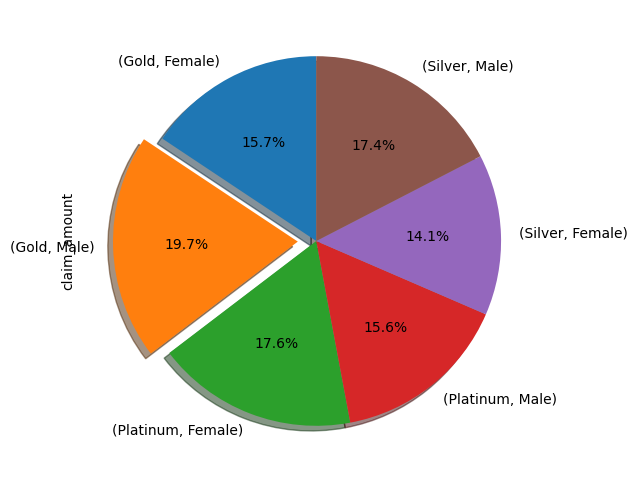

In [49]:
t1.plot.pie(y='claim_amount',  autopct='%1.1f%%', figsize=(8, 6), shadow=True, startangle=90, explode=(0, 0.1, 0, 0, 0, 0))

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

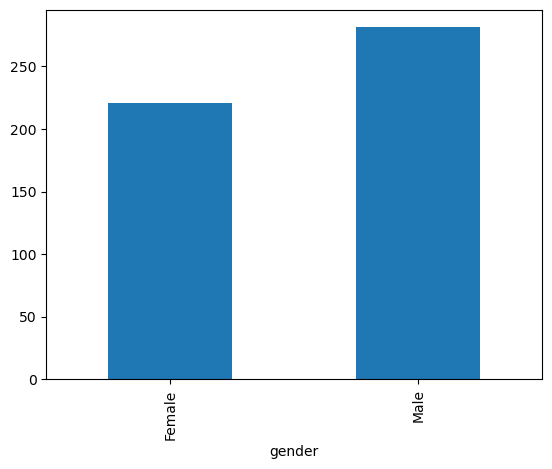

In [50]:
gender_driver_claim_count=cust_demographics_claims.loc[ cust_demographics_claims.incident_cause.isin(['Driver error', 'Other driver error']), ].groupby(by='gender').incident_cause.count().plot(kind='bar')

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

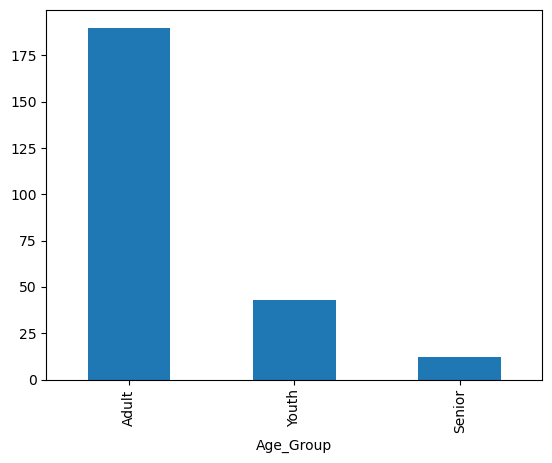

In [51]:
age_group_fraud_claim=cust_demographics_claims.loc[ cust_demographics_claims.fraudulent=='Yes', ].groupby(by='Age_Group').fraudulent.count().sort_values(ascending=False).plot(kind='bar')

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [52]:
cust_demographics_claims['Month']=cust_demographics_claims.claim_date.apply(lambda x:x.month)

<AxesSubplot:xlabel='Month'>

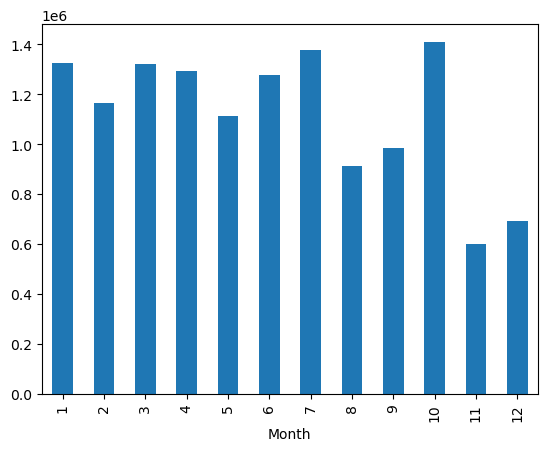

In [53]:
cust_demographics_claims.groupby('Month').claim_amount.sum().plot(kind='bar')

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [54]:
Fraud_amount_gender=pd.DataFrame(cust_demographics_claims.loc[(cust_demographics_claims.fraudulent=="Yes")].groupby(["gender","Age_Group"])[["claim_amount"]].mean())
Non_Fraud_amount_gender=pd.DataFrame(cust_demographics_claims.loc[(cust_demographics_claims.fraudulent=="No")].groupby(["gender","Age_Group"])[["claim_amount"]].mean())

In [55]:
Fraud_amount_gender.head(5)

claim_amount
gender Age_Group              
Female Adult      12317.067652
       Senior      4387.888889
       Youth       8854.700283
Male   Adult      15294.105550
       Senior     28232.500000

In [56]:
Non_Fraud_amount_gender.head(5)

claim_amount
gender Age_Group              
Female Adult      11977.552497
       Senior     16322.431639
       Youth      12946.612009
Male   Adult      12232.408464
       Senior     13210.517427

In [57]:
claim_age_gender=pd.merge(Fraud_amount_gender, Non_Fraud_amount_gender, on=['gender', 'Age_Group'])

In [58]:
claim_age_gender

claim_amount_x  claim_amount_y
gender Age_Group                                
Female Adult        12317.067652    11977.552497
       Senior        4387.888889    16322.431639
       Youth         8854.700283    12946.612009
Male   Adult        15294.105550    12232.408464
       Senior       28232.500000    13210.517427
       Youth        11005.616815    12429.124828

In [59]:
claim_age_gender.rename(columns={'claim_amount_x':'Frauds_claim_amount', 'claim_amount_y': 'Non_Frauds_claim_amount'}, inplace=True)

<AxesSubplot:xlabel='gender,Age_Group'>

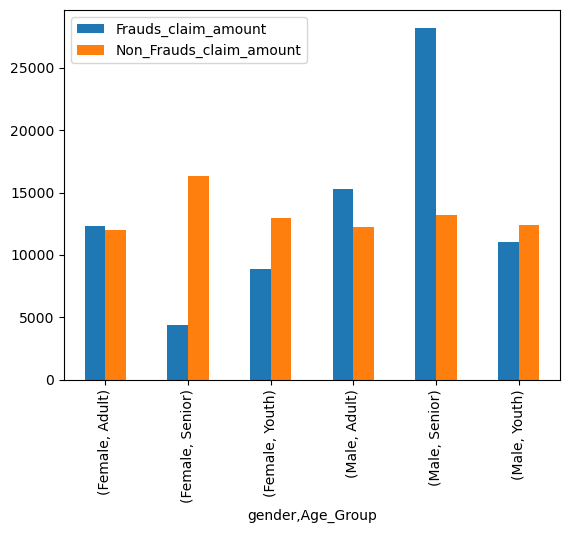

In [60]:
claim_age_gender.plot(kind='bar')

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

### 16. Is there any similarity in the amount claimed by males and females?

In [61]:
# To find if there is any simalirity between amount claimed by males and females we need to perform Hypothesis Testing

In [62]:
# First lets find the amount claimed by males and females

claim_by_male=cust_demographics_claims['claim_amount'].loc[cust_demographics_claims['gender']=='Male']
claim_by_female=cust_demographics_claims['claim_amount'].loc[cust_demographics_claims['gender']=='Female']

In [63]:
print("Mean of claims by males (u1)", claim_by_male.mean())

Mean of claims by males (u1) 12884.845110657638


In [64]:
print("Mean of claims by females (u2)", claim_by_female.mean())

Mean of claims by females (u2) 12101.160474551885


In [65]:
# We need to perform two sample t-test 
#(Implementing two sample t test because where we have 2 samples to compare, belonging to different objects, one is gender & other is claim amount.


# Assumptions for t test 
# 
# Measurements for one observation do not affect measurements for any other observation. Data values must be independent. 
# Data in each group must be obtained via a random sample from the population.
# Data in each group are normally distributed.
# Data values are continuous.

###### STEP 1: Define Null Hypothesis (H0):

                                    u1=u2
                                    
                                    or
                                    
                                    Amount claimed by Males and Females are same

###### STEP 2: Define Null Hypothesis (Ha):

                                    u1!=u2
                                    
                                    or
                                    
                                    Amount claimed by Males and Females are different

##### STEP 3: Define Confident Interval (CI) and p value:

                                     CI =95% (cut off 1.960)
                                     pvalue=0.05

#### STEP 4: Perform test:

 t- test (where we have 2 samples to compare, belonging to different objects, one is gender & other is claim amount)

In [66]:
t=stats.ttest_ind(claim_by_male, claim_by_female)
t_score=t.statistic
p_value=t.pvalue

In [67]:
print("the t-score is {} and the p-value is {}".format(t_score,p_value))

the t-score is 0.9625093446632118 and the p-value is 0.33601006135365463


##### STEP 5: Rejection Rule:

In [68]:
if (p_value<0.05):
    print("We reject Null Hypothesis H0")
else:
    print("We fail to reject Null Hypothesis")

We fail to reject Null Hypothesis


#####  STEP 6: Business Conclusion:

There is a similarity between claim amount by males and females

### 17. Is there any relationship between age category and segment?

In [69]:
# Both are categorical data age group and segment, so find a relationship between two categorical data, we perform pearson r test

###### STEP 1: Define Null Hypothesis H0:

Age Group and Segment are independent

###### STEP 2: Define Null Hypothesis H0:

Age Group and Segment are dependent

##### STEP 3: Define Confident Interval and pvalue:
        CI= 95% (cut off=1.960)
        pvale=0.05

##### STEP 4: Perform Test: PearsonR Test

In [70]:
cust_demographics_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 286 to 732
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          1078 non-null   int64         
 1   gender               1078 non-null   object        
 2   DateOfBirth          1078 non-null   datetime64[ns]
 3   State                1078 non-null   object        
 4   Contact              1078 non-null   object        
 5   Segment              1078 non-null   object        
 6   claim_id             1078 non-null   int64         
 7   incident_cause       1078 non-null   object        
 8   claim_date           1078 non-null   datetime64[ns]
 9   claim_area           1078 non-null   object        
 10  police_report        1078 non-null   object        
 11  claim_type           1078 non-null   object        
 12  claim_amount         1078 non-null   float64       
 13  total_policy_claims  1068 non-nu

In [71]:
#chi_square test
obs_freq=pd.crosstab(cust_demographics_claims.Age_Group, cust_demographics_claims.Segment)

In [72]:
obs_freq

Segment,Gold,Platinum,Silver
Age_Group,,,
Adult,279,269,252
Senior,20,20,18
Youth,72,72,76


In [73]:
chi_square_test=stats.chi2_contingency(obs_freq)

In [74]:
chi_square_test

(0.8111365100882464,
 0.9369488549748012,
 4,
 array([[275.32467532, 267.90352505, 256.77179963],
        [ 19.96103896,  19.42300557,  18.61595547],
        [ 75.71428571,  73.67346939,  70.6122449 ]]))

In [75]:
chi_square_score=chi_square_test[0]
p_value=chi_square_test[1]
dof_score=chi_square_test[2]
exp_array=chi_square_test[3]

##### STEP 5: Rejection Rule:

* Chi score = 0.811 which is less than 9.48(from chi sq table with DOF 4)
    Hence reject H0

In [76]:
if p_value<0.05:
    print('We reject Null Hypothesis H0')
else:
    print('We fail to reject Null Hypothesis H0')

We fail to reject Null Hypothesis H0


###### STEP 6: Business Conclusion:

Age Group  and Segment are not dependent

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.


In [77]:
cust_demographics_claims_new= pd.DataFrame(cust_demographics_claims)

In [78]:
cust_demographics_claims_new['Year']=cust_demographics_claims_new.claim_date.apply(lambda x:x.year)

In [79]:
cust_demographics_claims_new.head(3)

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_Group,Month,Year
286,93915431,Male,1967-09-08 18:00:00,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,Yes,Material and injury,42124.5,1.0,Yes,0,55.0,Adult,10,2018
1058,56425562,Female,1963-03-18 18:00:00,GA,823-712-3528,Platinum,38011383,Natural causes,2017-09-14,Auto,Yes,Material only,1670.0,1.0,No,0,60.0,Adult,9,2017
420,9884792,Male,1974-12-23 00:00:00,GA,764-745-3951,Silver,92714664,Driver error,2017-09-14,Auto,No,Injury only,29630.0,1.0,No,1,48.0,Adult,9,2017


In [80]:
cust_demo_2018=cust_demographics_claims_new.loc[cust_demographics_claims_new.Year==2018, 'claim_amount']

##### STEP 1: Define Null Hypothesis H0:
        
       Current year claim amount is decreased than or equal to 2016-17 fiscal year
       u0<=u1

##### STEP 2: Define Alternate Hypothesis Ha:
       Current year claim amount is increased from 2016-17 fiscal year
       u0>u1

##### STEP 3: Define Confident Interval and p value
 CI= 99%
 p_value=0.01

##### STEP 4: Perform Test

In [81]:
t_score, p_value=stats.ttest_1samp(cust_demo_2018, 10000)
print("The t score is {}, and p value is: {}".format(t_score, p_value))

The t score is 4.477343563243787, and p value is: 9.43584422198333e-06


##### STEP 5: Rejection Rule

In [82]:
if p_value<0.05:
    print("We reject the Null Hypothesis")
else:
    print("We fail to reject the Null Hypothesis")

We reject the Null Hypothesis


##### STEP 6: Business Conclusion:

Current year claim amount is increased from 2016-17 fiscal year

### 19. Is there any difference between age groups and insurance claims?

In [83]:
cust_demographics_claims.Age_Group.nunique()

3

In [84]:
cust_demographics_claims.Age_Group.value_counts()

Adult     800
Youth     220
Senior     58
Name: Age_Group, dtype: int64

In [85]:
claimed_policies='claim_amount'

In [86]:
s1=cust_demographics_claims.loc[cust_demographics_claims.Age_Group=='Adult', claimed_policies]
s2=cust_demographics_claims.loc[cust_demographics_claims.Age_Group=='Youth', claimed_policies]
s3=cust_demographics_claims.loc[cust_demographics_claims.Age_Group=='Senior', claimed_policies]

In [87]:
print('Mean of Adult amount claimed: ', s1.mean(), '\nMean of Youth amount claimed: ', s2.mean(), '\nMean of Adult amount claimed: ', s3.mean())

Mean of Adult amount claimed:  12515.46286093288 
Mean of Youth amount claimed:  12138.092506506324 
Mean of Adult amount claimed:  13691.561825577832


##### STEP 1: Define Null Hypothesis H0:
Age Group and insurance claims are independent

##### STEP 2: Define Alternate Hypothesis Ha:
Age Group and insurance claim are dependent

##### STEP 3: Define Confident Interval and pvalue:
    CI= 95% (cut off=1.960)
    pvale=0.05


##### STEP 4: Perform Test: ANOVA test

In [88]:
t=stats.f_oneway(s1, s2, s3)
f_score=t.statistic
p_value=t.pvalue
print('The f_score is: {}, and p_value is: {}'.format(f_score, p_value))

The f_score is: 0.31140668619798223, and p_value is: 0.7324819994390802


##### STEP 5: Rejection Rule:

In [89]:
if p_value<0.05:
    print("We reject Null Hypothesis!")
else:
    print("\nWe fail to reject Null Hypothesis!")


We fail to reject Null Hypothesis!


##### STEP 6: Business Conclusion

Age Group and insurance claim are independent

### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [90]:
cust_demographics_claims.nunique()

customer_id            1078
gender                    2
DateOfBirth            1078
State                    50
Contact                1078
Segment                   3
claim_id               1078
incident_cause            5
claim_date              100
claim_area                2
police_report             2
claim_type                3
claim_amount            675
total_policy_claims       8
fraudulent                2
flag                      2
Age                      41
Age_Group                 3
Month                    12
Year                      2
dtype: int64

##### STEP 1 : Define Null Hypothesis (H0):

Total number of policy claims and claim amount are not dependent

##### STEP 2: Define Alternate Hypothesis (Ha):
Total number of policy claims and claim amount are dependent

##### STEP 3: Define Confience Interval (CI) and p value:

    CI=95% (1.960)
    p value=0.05

#### STEP 4 : Perform Test: ANOVA | F test

In [91]:
cust_demographics_claims.total_policy_claims.value_counts()

1.0    779
2.0    105
3.0     85
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [92]:
usage='claim_amount'

In [93]:
s1=cust_demographics_claims.loc[cust_demographics_claims.total_policy_claims==1.0, usage]
s2=cust_demographics_claims.loc[cust_demographics_claims.total_policy_claims==2.0, usage]
s3=cust_demographics_claims.loc[cust_demographics_claims.total_policy_claims==3.0, usage]
s4=cust_demographics_claims.loc[cust_demographics_claims.total_policy_claims==4.0, usage]
s5=cust_demographics_claims.loc[cust_demographics_claims.total_policy_claims==5.0, usage]
s6=cust_demographics_claims.loc[cust_demographics_claims.total_policy_claims==6.0, usage]
s7=cust_demographics_claims.loc[cust_demographics_claims.total_policy_claims==7.0, usage]
s8=cust_demographics_claims.loc[cust_demographics_claims.total_policy_claims==8.0, usage]

In [94]:
f_score, p_value=stats.f_oneway(s1, s2, s3, s4, s5, s6, s7, s8)

In [95]:
f_score

0.838930514038453

In [96]:
p_value

0.5549962679331616

##### STEP 5 : Rejection Rule

In [97]:
if p_value<0.05:
    print("We reject Null Hypothesis !")
else:
    print("We fail to reject Null Hypothesis !")

We fail to reject Null Hypothesis !


##### STEP 6 : Business Conclusion:
Total poilcy claims and claim amount are not dependent